In [ ]:
#Importing the libraries used for working with the dataset
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# **Attaining required dataset**

**Fetching Multiple Data Sets from the year 2021 across the quarters**

In [ ]:
#Attaining the required dataset

Visaapproval_data_Q1 = pd.read_csv('/content/LCA_Disclosure_Data_FY2021_Q1.csv')
Visaapproval_data_Q2 = pd.read_csv('/content/LCA_Disclosure_Data_FY2021_Q2.csv')
Visaapproval_data_Q3 = pd.read_csv('/content/LCA_Disclosure_Data_FY2021_Q3.csv')
Visaapproval_data_Q4 = pd.read_csv('/content/LCA_Disclosure_Data_FY2021_Q4.csv')

#Checking length of each data set
print("Total length of the Q1 data",len(Visaapproval_data_Q1))
print("Total length of the Q2 data",len(Visaapproval_data_Q2))
print("Total length of the Q3 data",len(Visaapproval_data_Q3))
print("Total length of the Q4 data",len(Visaapproval_data_Q4))

Total length of the Q1 data 80622
Total length of the Q2 data 213481
Total length of the Q3 data 405626
Total length of the Q4 data 126576


**Merging Multiple Data Sets from the year 2021 across the quarters**

In [ ]:
#Merging the acquired multiple datafiles

print("Merging multiple CSV files...")

Visaapproval_data_Q1toQ4 = pd.concat(map(pd.read_csv, ['/content/LCA_Disclosure_Data_FY2021_Q1.csv','/content/LCA_Disclosure_Data_FY2021_Q2.csv','/content/LCA_Disclosure_Data_FY2021_Q3.csv','/content/LCA_Disclosure_Data_FY2021_Q4.csv']), ignore_index=True)

print("Total length of the data", len(Visaapproval_data_Q1toQ4))

value = Visaapproval_data_Q1toQ4.columns
print("Total number of columns in the data",len(value))

Merging multiple CSV files...
Total length of the data 826305
Total number of columns in the data 98


#Cleaning the dataset.

As we are going to be dealing with only H1b visa's we shall drop any other visa present in the dataset

In [ ]:
H1b_data_only = Visaapproval_data_Q1toQ4['VISA_CLASS'].isin(['H-1B'])
Visaapproval_H1Bdata_Q1toQ4 = Visaapproval_data_Q1toQ4[H1b_data_only]

print("Total lenght of data after keep only H1B Visa Class ",len(Visaapproval_H1Bdata_Q1toQ4))

Total lenght of data after keep only H1B Visa Class  803733


Checking if any value other than H1b still exists

In [ ]:

print("Does any other value other than H1b still exists?")

~(Visaapproval_H1Bdata_Q1toQ4['VISA_CLASS'].isin(['H-1B'])).any()

Does any other value other than H1b still exists?


False

Lets see what all columns are we left with in our dataset

In [ ]:
 #Lets see what all columns are we left with in our dataset
Visaapproval_H1Bdata_Q1toQ4.columns


Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS_1',
       'EMPLOYER_POC_ADDRESS_2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_P

Let us also know what type they are

In [ ]:
#Let us also know what type they are

Visaapproval_H1Bdata_Q1toQ4.dtypes

CASE_NUMBER                object
CASE_STATUS                object
RECEIVED_DATE              object
DECISION_DATE              object
ORIGINAL_CERT_DATE         object
                            ...  
PREPARER_MIDDLE_INITIAL    object
PREPARER_BUSINESS_NAME     object
PREPARER_EMAIL             object
EMPLOYER_POC_ADDRESS1      object
EMPLOYER_POC_ADDRESS2      object
Length: 98, dtype: object

Based on my understanding the columns that made sense to me are define as important cols as below:

As we attained the h1-b data and no longer require to define a visa class hence removing it.

In [ ]:
Important_Cols = ['CASE_NUMBER','CASE_STATUS','SOC_TITLE','JOB_TITLE','FULL_TIME_POSITION','TOTAL_WORKER_POSITIONS','NEW_EMPLOYMENT','EMPLOYER_NAME','NAICS_CODE','PREVAILING_WAGE','PW_WAGE_LEVEL','H1B_DEPENDENT','WILLFUL_VIOLATOR','WORKSITE_STATE']

Final_Visaapproval_H1Bdata_Q1toQ4 = Visaapproval_H1Bdata_Q1toQ4[Important_Cols]

Final_Visaapproval_H1Bdata_Q1toQ4.head()

,CASE_NUMBER,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,I-200-20268-843329,Certified,"Software Developers, Applications",Senior Technical Architect,Y,1,0,Hexaware Technologies Inc.,541512,"$97,406.00",II,Y,N,VA
1,I-200-20268-843033,Certified,Computer Programmers,Programmer Analyst\t,Y,1,0,WIPRO LIMITED,541511,"$84,510.00",II,Y,N,TX
2,I-200-20268-843527,Certified,"Software Developers, Applications",Software Developer,Y,6,1,"Mastech Digital InfoTech, Inc.",541511,"$70,678.00",II,Y,N,OH
3,I-200-20268-844241,Certified,Computer Systems Analysts,JAVA ANALYST 2,Y,1,0,VIRTUSA CORPORATION,541511,"$81,453.00",II,Y,N,CT
4,I-200-20268-844003,Certified,Database Administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,"XTGLOBAL, INC.",541511,"$91,146.00",II,Y,N,TX


As we are trying to predict if the application shall get approved or rejected we try and clean the data


We want to predict over all approval accuracy than for a particular case hence we are dropping the column CASE_NUMBER
also doesnt add up to the requirement as an important feature for approval of H1-b Visa.

In [ ]:

Final_Visaapproval_H1Bdata_Q1toQ4=Final_Visaapproval_H1Bdata_Q1toQ4.drop('CASE_NUMBER',axis=1)


Datacheck after removal of CASE_NUMBER column removal

In [ ]:

Final_Visaapproval_H1Bdata_Q1toQ4.head()

,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,Certified,"Software Developers, Applications",Senior Technical Architect,Y,1,0,Hexaware Technologies Inc.,541512,"$97,406.00",II,Y,N,VA
1,Certified,Computer Programmers,Programmer Analyst\t,Y,1,0,WIPRO LIMITED,541511,"$84,510.00",II,Y,N,TX
2,Certified,"Software Developers, Applications",Software Developer,Y,6,1,"Mastech Digital InfoTech, Inc.",541511,"$70,678.00",II,Y,N,OH
3,Certified,Computer Systems Analysts,JAVA ANALYST 2,Y,1,0,VIRTUSA CORPORATION,541511,"$81,453.00",II,Y,N,CT
4,Certified,Database Administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,"XTGLOBAL, INC.",541511,"$91,146.00",II,Y,N,TX


Let us next know if any value is empty or not in our dataset

In [ ]:
Final_Visaapproval_H1Bdata_Q1toQ4.isnull().sum()

CASE_STATUS                   0
SOC_TITLE                     0
JOB_TITLE                     0
FULL_TIME_POSITION            0
TOTAL_WORKER_POSITIONS        0
NEW_EMPLOYMENT                0
EMPLOYER_NAME                 2
NAICS_CODE                    0
PREVAILING_WAGE               1
PW_WAGE_LEVEL             83560
H1B_DEPENDENT                 0
WILLFUL_VIOLATOR              0
WORKSITE_STATE                1
dtype: int64

We can see that the columns Employer_Name,Worksite_City,Worksite_State,Prevailing_Wage and PW_Wage level have null values.Hence we are dropping those NA values

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4 = Final_Visaapproval_H1Bdata_Q1toQ4.dropna()

New_Final_Visaapproval_H1Bdata_Q1toQ4


,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,Certified,"Software Developers, Applications",Senior Technical Architect,Y,1,0,Hexaware Technologies Inc.,541512,"$97,406.00",II,Y,N,VA
1,Certified,Computer Programmers,Programmer Analyst\t,Y,1,0,WIPRO LIMITED,541511,"$84,510.00",II,Y,N,TX
2,Certified,"Software Developers, Applications",Software Developer,Y,6,1,"Mastech Digital InfoTech, Inc.",541511,"$70,678.00",II,Y,N,OH
3,Certified,Computer Systems Analysts,JAVA ANALYST 2,Y,1,0,VIRTUSA CORPORATION,541511,"$81,453.00",II,Y,N,CT
4,Certified,Database Administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,"XTGLOBAL, INC.",541511,"$91,146.00",II,Y,N,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826300,Withdrawn,"Software Developers, Systems Software",SOFTWARE DEVELOPMENT,Y,1,1,"ESCOBEDO CONSTRUCTION, LP",23611,"$72,384.00",I,No,No,TX
826301,Withdrawn,"Business Teachers, Postsecondary",Assistant Professor of Instruction,Y,1,1,The University of Texas at Dallas,6113,"$18,340.00",I,No,No,TX
826302,Withdrawn,"Software Developers, Applications",Engineering Lead,Y,1,0,NIC INFO TEK INC,541511,"$80,330.00",II,Yes,No,TN
826303,Withdrawn,"Software Developers, Applications",Engineering Lead,Y,1,0,NIC INFO TEK INC,541511,"$80,330.00",II,Yes,No,TN


Rechecking after all the NA values have been removed from the data set.

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4.isna().sum()

CASE_STATUS               0
SOC_TITLE                 0
JOB_TITLE                 0
FULL_TIME_POSITION        0
TOTAL_WORKER_POSITIONS    0
NEW_EMPLOYMENT            0
EMPLOYER_NAME             0
NAICS_CODE                0
PREVAILING_WAGE           0
PW_WAGE_LEVEL             0
H1B_DEPENDENT             0
WILLFUL_VIOLATOR          0
WORKSITE_STATE            0
dtype: int64

As we are going to be working on Approval or rejection of the applications, let's check what the status are in our collected data and improve or correct them accordingly.

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4['CASE_STATUS'].value_counts()

Certified                674279
Certified - Withdrawn     29717
Withdrawn                 13844
Denied                     2331
Name: CASE_STATUS, dtype: int64

As there are 4 different case statuses and we are trying to classify them for better results we wpuld want to further combine these statuses and would be changing them to Approved and Denied by using the query statements in pandas.


In [ ]:
case_status_holder = New_Final_Visaapproval_H1Bdata_Q1toQ4['CASE_STATUS']

New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[case_status_holder == 'Withdrawn', 'CASE_STATUS'] = 'Rejected'
New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[case_status_holder == 'Denied', 'CASE_STATUS'] = 'Rejected'
New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[case_status_holder == 'Certified', 'CASE_STATUS'] = 'Approved'
New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[case_status_holder == 'Certified - Withdrawn', 'CASE_STATUS'] = 'Approved'


Rechecking if the status changed or not

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4['CASE_STATUS'].value_counts()

Approved    703996
Rejected     16175
Name: CASE_STATUS, dtype: int64

Checking the datatypes of the columns currently present in our dataset

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4.dtypes

CASE_STATUS               object
SOC_TITLE                 object
JOB_TITLE                 object
FULL_TIME_POSITION        object
TOTAL_WORKER_POSITIONS     int64
NEW_EMPLOYMENT             int64
EMPLOYER_NAME             object
NAICS_CODE                 int64
PREVAILING_WAGE           object
PW_WAGE_LEVEL             object
H1B_DEPENDENT             object
WILLFUL_VIOLATOR          object
WORKSITE_STATE            object
dtype: object

As we can see above the wage is also an object we would want the PREVAILING WAGE LEVEL also to be in float or int type.

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4['PREVAILING_WAGE'] = New_Final_Visaapproval_H1Bdata_Q1toQ4['PREVAILING_WAGE'].str. replace ('$','') 
New_Final_Visaapproval_H1Bdata_Q1toQ4['PREVAILING_WAGE'] = New_Final_Visaapproval_H1Bdata_Q1toQ4['PREVAILING_WAGE'].str. replace (',','') 
New_Final_Visaapproval_H1Bdata_Q1toQ4['PREVAILING_WAGE'] = New_Final_Visaapproval_H1Bdata_Q1toQ4['PREVAILING_WAGE'].astype(float) 

New_Final_Visaapproval_H1Bdata_Q1toQ4

,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,Approved,"Software Developers, Applications",Senior Technical Architect,Y,1,0,Hexaware Technologies Inc.,541512,97406.0,II,Y,N,VA
1,Approved,Computer Programmers,Programmer Analyst\t,Y,1,0,WIPRO LIMITED,541511,84510.0,II,Y,N,TX
2,Approved,"Software Developers, Applications",Software Developer,Y,6,1,"Mastech Digital InfoTech, Inc.",541511,70678.0,II,Y,N,OH
3,Approved,Computer Systems Analysts,JAVA ANALYST 2,Y,1,0,VIRTUSA CORPORATION,541511,81453.0,II,Y,N,CT
4,Approved,Database Administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,"XTGLOBAL, INC.",541511,91146.0,II,Y,N,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826300,Rejected,"Software Developers, Systems Software",SOFTWARE DEVELOPMENT,Y,1,1,"ESCOBEDO CONSTRUCTION, LP",23611,72384.0,I,No,No,TX
826301,Rejected,"Business Teachers, Postsecondary",Assistant Professor of Instruction,Y,1,1,The University of Texas at Dallas,6113,18340.0,I,No,No,TX
826302,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,NIC INFO TEK INC,541511,80330.0,II,Yes,No,TN
826303,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,NIC INFO TEK INC,541511,80330.0,II,Yes,No,TN


Checking if the column prevailing wage got changed from a object data type to float.

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4.dtypes

CASE_STATUS                object
SOC_TITLE                  object
JOB_TITLE                  object
FULL_TIME_POSITION         object
TOTAL_WORKER_POSITIONS      int64
NEW_EMPLOYMENT              int64
EMPLOYER_NAME              object
NAICS_CODE                  int64
PREVAILING_WAGE           float64
PW_WAGE_LEVEL              object
H1B_DEPENDENT              object
WILLFUL_VIOLATOR           object
WORKSITE_STATE             object
dtype: object

Next, Lets see employer_name value counts

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4['EMPLOYER_NAME'].value_counts()

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    17919
Google LLC                                13531
Microsoft Corporation                     11369
TATA CONSULTANCY SERVICES LIMITED          8790
INFOSYS LIMITED                            8021
                                          ...  
SECUNETICS INC                                1
Rockport VAL, LLC                             1
COMPASS MINERALS AMERICA INC.                 1
Tektroop LLC                                  1
Signature Diagnostics, Inc                    1
Name: EMPLOYER_NAME, Length: 57136, dtype: int64

We can see that there are various employer names which are similar and we can group them as one if same or based on university and coorporate for easier classification of data.

In [ ]:
#As all the names are in various cases we change them to either upper case or lower case, i changed it to upper case.
New_Final_Visaapproval_H1Bdata_Q1toQ4['EMPLOYER_NAME']= New_Final_Visaapproval_H1Bdata_Q1toQ4['EMPLOYER_NAME'].str.upper()

In [ ]:
#Lets see how many are university or coorporate applying for h1b

New_Final_Visaapproval_H1Bdata_Q1toQ4

,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,Approved,"Software Developers, Applications",Senior Technical Architect,Y,1,0,HEXAWARE TECHNOLOGIES INC.,541512,97406.0,II,Y,N,VA
1,Approved,Computer Programmers,Programmer Analyst\t,Y,1,0,WIPRO LIMITED,541511,84510.0,II,Y,N,TX
2,Approved,"Software Developers, Applications",Software Developer,Y,6,1,"MASTECH DIGITAL INFOTECH, INC.",541511,70678.0,II,Y,N,OH
3,Approved,Computer Systems Analysts,JAVA ANALYST 2,Y,1,0,VIRTUSA CORPORATION,541511,81453.0,II,Y,N,CT
4,Approved,Database Administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,"XTGLOBAL, INC.",541511,91146.0,II,Y,N,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826300,Rejected,"Software Developers, Systems Software",SOFTWARE DEVELOPMENT,Y,1,1,"ESCOBEDO CONSTRUCTION, LP",23611,72384.0,I,No,No,TX
826301,Rejected,"Business Teachers, Postsecondary",Assistant Professor of Instruction,Y,1,1,THE UNIVERSITY OF TEXAS AT DALLAS,6113,18340.0,I,No,No,TX
826302,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,NIC INFO TEK INC,541511,80330.0,II,Yes,No,TN
826303,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,NIC INFO TEK INC,541511,80330.0,II,Yes,No,TN


#Based on the below we can replace the value if the string consists of university with university and if otherwise then coorporate

In [ ]:
employer_holder = New_Final_Visaapproval_H1Bdata_Q1toQ4['EMPLOYER_NAME']

New_Final_Visaapproval_H1Bdata_Q1toQ4['EMPLOYER_NAME'] = New_Final_Visaapproval_H1Bdata_Q1toQ4['EMPLOYER_NAME'].apply(lambda x : 'University' if 'UNIVERSITY' in x else 'Coorporate')

New_Final_Visaapproval_H1Bdata_Q1toQ4['EMPLOYER_NAME'].value_counts()

New_Final_Visaapproval_H1Bdata_Q1toQ4.groupby('EMPLOYER_NAME')['CASE_STATUS'].value_counts(normalize=True)

EMPLOYER_NAME  CASE_STATUS
Coorporate     Approved       0.977775
               Rejected       0.022225
University     Approved       0.971969
               Rejected       0.028031
Name: CASE_STATUS, dtype: float64

Looking at the final values of employer

In [ ]:

New_Final_Visaapproval_H1Bdata_Q1toQ4


,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,Approved,"Software Developers, Applications",Senior Technical Architect,Y,1,0,Coorporate,541512,97406.0,II,Y,N,VA
1,Approved,Computer Programmers,Programmer Analyst\t,Y,1,0,Coorporate,541511,84510.0,II,Y,N,TX
2,Approved,"Software Developers, Applications",Software Developer,Y,6,1,Coorporate,541511,70678.0,II,Y,N,OH
3,Approved,Computer Systems Analysts,JAVA ANALYST 2,Y,1,0,Coorporate,541511,81453.0,II,Y,N,CT
4,Approved,Database Administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,Coorporate,541511,91146.0,II,Y,N,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826300,Rejected,"Software Developers, Systems Software",SOFTWARE DEVELOPMENT,Y,1,1,Coorporate,23611,72384.0,I,No,No,TX
826301,Rejected,"Business Teachers, Postsecondary",Assistant Professor of Instruction,Y,1,1,University,6113,18340.0,I,No,No,TX
826302,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,Coorporate,541511,80330.0,II,Yes,No,TN
826303,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,Coorporate,541511,80330.0,II,Yes,No,TN


Equalizing all the data on whole for H1B_Dependent

In [ ]:
H1b_dependent_holder = New_Final_Visaapproval_H1Bdata_Q1toQ4['H1B_DEPENDENT']

New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[H1b_dependent_holder == 'Y', 'H1B_DEPENDENT'] = 'Yes'
New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[H1b_dependent_holder == 'N', 'H1B_DEPENDENT'] = 'No'

New_Final_Visaapproval_H1Bdata_Q1toQ4

,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,Approved,"Software Developers, Applications",Senior Technical Architect,Y,1,0,Coorporate,541512,97406.0,II,Yes,N,VA
1,Approved,Computer Programmers,Programmer Analyst\t,Y,1,0,Coorporate,541511,84510.0,II,Yes,N,TX
2,Approved,"Software Developers, Applications",Software Developer,Y,6,1,Coorporate,541511,70678.0,II,Yes,N,OH
3,Approved,Computer Systems Analysts,JAVA ANALYST 2,Y,1,0,Coorporate,541511,81453.0,II,Yes,N,CT
4,Approved,Database Administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,Coorporate,541511,91146.0,II,Yes,N,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826300,Rejected,"Software Developers, Systems Software",SOFTWARE DEVELOPMENT,Y,1,1,Coorporate,23611,72384.0,I,No,No,TX
826301,Rejected,"Business Teachers, Postsecondary",Assistant Professor of Instruction,Y,1,1,University,6113,18340.0,I,No,No,TX
826302,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,Coorporate,541511,80330.0,II,Yes,No,TN
826303,Rejected,"Software Developers, Applications",Engineering Lead,Y,1,0,Coorporate,541511,80330.0,II,Yes,No,TN


Checking for the SOC_Title values to be categorized

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4.SOC_TITLE.value_counts()

Software Developers, Applications                      237559
Computer Systems Analysts                               44428
Software Developers, Systems Software                   43191
Computer Systems Engineers/Architects                   24710
Software Quality Assurance Engineers and Testers        18943
                                                        ...  
Hairdressers, Hairstylists, and Cosmetologists              1
Software Quality and Assurance Analysts and Testers         1
Medical Secretaries                                         1
Cargo and Freight Agents                                    1
Industrial Safety and Health Engineers.                     1
Name: SOC_TITLE, Length: 788, dtype: int64

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4.SOC_TITLE.values

array(['Software Developers, Applications', 'Computer Programmers',
       'Software Developers, Applications', ...,
       'Software Developers, Applications',
       'Software Developers, Applications',
       'Computer and Information Systems Managers'], dtype=object)

In [ ]:

New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE']=New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].apply(lambda x:x.lower())
New_Final_Visaapproval_H1Bdata_Q1toQ4['CATEGORY_OF_JOB'] = np.nan
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('computer','programmer')] = 'Software'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('software','developer')] = 'Software'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('database','web')] = 'Software'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('information security','information tech')] = 'Software'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('applications','computer and information')] = 'Software'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('math','statistic')] = 'Mathematician'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('predictive model','stats')] = 'Mathematician'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('teacher','linguist')] = 'Education'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('professor','Teach')] = 'Education'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('school principal')] = 'Education'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('medical','doctor')] = 'Medical'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('physician','dentist')] = 'Medical'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('Health','Physical Therapists')] = 'Medical'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('surgeon','nurse')] = 'Medical'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('psychiatr')] = 'Medical'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('biology','scientist')] = 'Sciences'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('biologi','clinical research')] = 'Sciences'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('public relation','manage')] = 'Management'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('management','operation')] = 'Management'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('chief','plan')] = 'Management'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('executive')] = 'Management'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('advertis','marketing')] = 'Marketing'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('promotion','market research')] = 'Marketing'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('business','business analyst')] = 'Business'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('business systems analyst')] = 'Business'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('accountant','finance')] = 'Financial'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('engineer','architect')] = 'Architect'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('surveyor','carto')] = 'Architect'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB[New_Final_Visaapproval_H1Bdata_Q1toQ4['SOC_TITLE'].str.contains('technician','drafter')] = 'Architect'
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB = New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB.replace(np.NaN,'Not_STEM')


They are now partially classified

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4.CATEGORY_OF_JOB.value_counts(dropna=False)

Software         400794
Not_STEM         134044
Architect        114745
Business          15686
Medical           13328
Education         12945
Management        11778
Financial         10334
Sciences           5634
Mathematician       788
Marketing            95
Name: CATEGORY_OF_JOB, dtype: int64

Equalizing all the data on whole for WILLFUL_VIOLATOR

In [ ]:
Willful_Violator_holder = New_Final_Visaapproval_H1Bdata_Q1toQ4['WILLFUL_VIOLATOR']

New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[Willful_Violator_holder == 'Y', 'WILLFUL_VIOLATOR'] = 'Yes'
New_Final_Visaapproval_H1Bdata_Q1toQ4.loc[Willful_Violator_holder == 'N', 'WILLFUL_VIOLATOR'] = 'No'

New_Final_Visaapproval_H1Bdata_Q1toQ4

,CASE_STATUS,SOC_TITLE,JOB_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,EMPLOYER_NAME,NAICS_CODE,PREVAILING_WAGE,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,CATEGORY_OF_JOB
0,Approved,"software developers, applications",Senior Technical Architect,Y,1,0,Coorporate,541512,97406.0,II,Yes,No,VA,Software
1,Approved,computer programmers,Programmer Analyst\t,Y,1,0,Coorporate,541511,84510.0,II,Yes,No,TX,Software
2,Approved,"software developers, applications",Software Developer,Y,6,1,Coorporate,541511,70678.0,II,Yes,No,OH,Software
3,Approved,computer systems analysts,JAVA ANALYST 2,Y,1,0,Coorporate,541511,81453.0,II,Yes,No,CT,Software
4,Approved,database administrators,SQL DATABASE ADMINISTRATOR II,Y,1,0,Coorporate,541511,91146.0,II,Yes,No,TX,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826300,Rejected,"software developers, systems software",SOFTWARE DEVELOPMENT,Y,1,1,Coorporate,23611,72384.0,I,No,No,TX,Software
826301,Rejected,"business teachers, postsecondary",Assistant Professor of Instruction,Y,1,1,University,6113,18340.0,I,No,No,TX,Business
826302,Rejected,"software developers, applications",Engineering Lead,Y,1,0,Coorporate,541511,80330.0,II,Yes,No,TN,Software
826303,Rejected,"software developers, applications",Engineering Lead,Y,1,0,Coorporate,541511,80330.0,II,Yes,No,TN,Software


In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4.columns

Index(['CASE_STATUS', 'SOC_TITLE', 'JOB_TITLE', 'FULL_TIME_POSITION',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'EMPLOYER_NAME',
       'NAICS_CODE', 'PREVAILING_WAGE', 'PW_WAGE_LEVEL', 'H1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'WORKSITE_STATE', 'CATEGORY_OF_JOB'],
      dtype='object')

As we have already cassified the SOC_TITLE to a certain extent, proceeding to drop job title.Similarly WORKSITE_STATE has various unique values dropping it too

In [ ]:
New_Final_Visaapproval_H1Bdata_Q1toQ4 = New_Final_Visaapproval_H1Bdata_Q1toQ4.drop(['JOB_TITLE','WORKSITE_STATE','SOC_TITLE'],axis=1)

Final columns that seem to have association with the target variable

In [ ]:
Final_cols = ['CASE_STATUS','NEW_EMPLOYMENT',
       'FULL_TIME_POSITION', 'TOTAL_WORKER_POSITIONS',
       'EMPLOYER_NAME','CATEGORY_OF_JOB',
       'PREVAILING_WAGE', 'H1B_DEPENDENT','PW_WAGE_LEVEL',
       'WILLFUL_VIOLATOR']

 Dummies in pandas converts categorical data into dummy or indicator variables which helps us in better clasification of the data when applied to models.

In [ ]:
dummy = pd.get_dummies(New_Final_Visaapproval_H1Bdata_Q1toQ4[Final_cols], drop_first=True)
Dummy_Final_Visaapproval_H1Bdata_Q1toQ4 = pd.concat([New_Final_Visaapproval_H1Bdata_Q1toQ4.drop(Final_cols,axis=1),dummy],axis=1)

Checking if there are any NA values any more.

In [ ]:
Dummy_Final_Visaapproval_H1Bdata_Q1toQ4.isnull().values.any()

False

Displaying how the data looks now

In [ ]:
Dummy_Final_Visaapproval_H1Bdata_Q1toQ4

,NAICS_CODE,NEW_EMPLOYMENT,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE,CASE_STATUS_Rejected,FULL_TIME_POSITION_Y,EMPLOYER_NAME_University,CATEGORY_OF_JOB_Business,CATEGORY_OF_JOB_Education,CATEGORY_OF_JOB_Financial,...,CATEGORY_OF_JOB_Mathematician,CATEGORY_OF_JOB_Medical,CATEGORY_OF_JOB_Not_STEM,CATEGORY_OF_JOB_Sciences,CATEGORY_OF_JOB_Software,H1B_DEPENDENT_Yes,PW_WAGE_LEVEL_II,PW_WAGE_LEVEL_III,PW_WAGE_LEVEL_IV,WILLFUL_VIOLATOR_Yes
0,541512,0,1,97406.0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,541511,0,1,84510.0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,541511,1,6,70678.0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,541511,0,1,81453.0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
4,541511,0,1,91146.0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826300,23611,1,1,72384.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
826301,6113,1,1,18340.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
826302,541511,0,1,80330.0,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
826303,541511,0,1,80330.0,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


Before we start utilizing our models on the  finalized data attained, we need to split the data

Splitting the data among trainining data and test data by dropping the target column from the main dataset and adding it to test data. 

In [ ]:
train_data = Dummy_Final_Visaapproval_H1Bdata_Q1toQ4.drop('CASE_STATUS_Rejected',axis=1)
test_data = Dummy_Final_Visaapproval_H1Bdata_Q1toQ4['CASE_STATUS_Rejected']

However we aren't sure if our data is perfectly balanced, Hence one of the techniques learnt and studied in the process of analyzing and predicting the resultant is NearMiss, it helps us balance the data.

In [ ]:
nm = NearMiss()
train_samp,test_samp = nm.fit_resample(train_data,test_data)

Fitting an ExtraTreesRegressor to analyze if the features that we are left with are relavent or not

In [ ]:
imp_feature = ExtraTreesRegressor()
imp_feature.fit(train_samp,test_samp.values.ravel())

ExtraTreesRegressor()

Based on the plot we can see that the features we chose to be the final ones seem to be relavent to the target variable.

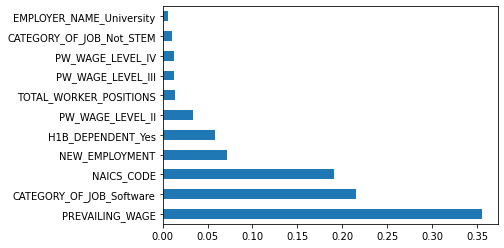

In [ ]:
Relevancy_of_features= pd.Series(imp_feature.feature_importances_, index=train_samp.columns)
Relevancy_of_features.nlargest(11).plot(kind='barh')
plt.show()

Hence now we proceed in splitting our data for application of our model to it.

In [ ]:
Initial_train, Initial_test, Dev_train, Dev_test = train_test_split(train_samp, test_samp, test_size=0.3, random_state=42)

# **Models Applied for Analysis** 

**1.Gaussian Naive Bayse**

We are using Gaussian NB as we have classified our data categorically.

In [ ]:
Gaussian_Classifier_applied = GaussianNB()
Gaussian_Classifier_applied.fit(Initial_train,Dev_train)

GaussianNB()

In [ ]:
Gaussian_Classifier_applied = GaussianNB()
Gaussian_Classifier_applied.fit(Initial_train,Dev_train)

The accuracies attained by applying Gaussian Naive Bayes to our data

In [ ]:
print("Train Accuracy =",Gaussian_Classifier_applied.score(Initial_train,Dev_train))
print("Test Accuracy =",Gaussian_Classifier_applied.score(Initial_test,Dev_test))

Train Accuracy = 0.6272024729520865
Test Accuracy = 0.624317362184441


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = Gaussian_Classifier_applied.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4389  489]
 [3157 1670]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.90      0.71      4878
           1       0.77      0.35      0.48      4827

    accuracy                           0.62      9705
   macro avg       0.68      0.62      0.59      9705
weighted avg       0.68      0.62      0.59      9705



Tunning the model and attaining better results

In [ ]:
params_NB = {'var_smoothing': [0.00000001, 0.000000001, 0.00000001]}


nb = GaussianNB()
tuned_Gaussian = GridSearchCV(estimator=nb, param_grid=params_NB, cv=5, verbose=1, n_jobs=4)
tuned_Gaussian.fit(Initial_train,Dev_train)
print(tuned_Gaussian.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'var_smoothing': 1e-08}


In [ ]:
print("Train Accuracy =",tuned_Gaussian.score(Initial_train,Dev_train))
print("Test Accuracy =",tuned_Gaussian.score(Initial_test,Dev_test))

Train Accuracy = 0.6352837270920733
Test Accuracy = 0.6346213292117465


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = tuned_Gaussian.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4312  566]
 [2980 1847]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.88      0.71      4878
           1       0.77      0.38      0.51      4827

    accuracy                           0.63      9705
   macro avg       0.68      0.63      0.61      9705
weighted avg       0.68      0.63      0.61      9705



2.Logistic Regression

A logistic regression is actually a classification technique that uses certain independent variables to calculate the probability of a categorical output.

In [ ]:
Logistic_Classifier_applied = LogisticRegression()
Logistic_Classifier_applied.fit(Initial_train,Dev_train)

LogisticRegression()

In [ ]:
print("Train Accuracy =",Logistic_Classifier_applied.score(Initial_train,Dev_train))
print("Test Accuracy =",Logistic_Classifier_applied.score(Initial_test,Dev_test))

Train Accuracy = 0.49887392360344446
Test Accuracy = 0.502627511591963


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = Logistic_Classifier_applied.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4878    0]
 [4827    0]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4878
           1       0.00      0.00      0.00      4827

    accuracy                           0.50      9705
   macro avg       0.25      0.50      0.33      9705
weighted avg       0.25      0.50      0.34      9705



Tunning the model and attaining better results 

In [ ]:
param_log_grid = {
    'penalty': ['l1','l2'],
    'C' :[0.1,0.01,0.001,0.0001,0.00001],
    'solver' :['liblinear','saga']
}


lr = LogisticRegression(random_state=42)
tuned_logistic_regressor = GridSearchCV(estimator=lr, param_grid=param_log_grid, cv=5, verbose=1, n_jobs=4)
tuned_logistic_regressor.fit(Initial_train,Dev_train)
print(tuned_logistic_regressor.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
print("Train Accuracy =",tuned_logistic_regressor.score(Initial_train,Dev_train))
print("Test Accuracy =",tuned_logistic_regressor.score(Initial_test,Dev_test))

Train Accuracy = 0.7208213733716052
Test Accuracy = 0.7259144770736734


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = tuned_logistic_regressor.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[3864 1014]
 [1646 3181]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      4878
           1       0.76      0.66      0.71      4827

    accuracy                           0.73      9705
   macro avg       0.73      0.73      0.72      9705
weighted avg       0.73      0.73      0.72      9705



3.Decision Tree

A decision tree splits data into a series of binary decisions. These decisions allow you to traverse down the tree based on these choices. After making all your decisions, you will arrive at a leaf node, from which you will obtain your predicted classification.

In [ ]:
DecissionTree_Classifier_applied = DecisionTreeClassifier()
DecissionTree_Classifier_applied.fit(Initial_train,Dev_train)

DecisionTreeClassifier()

In [ ]:
print("Train Accuracy =",DecissionTree_Classifier_applied.score(Initial_train,Dev_train))
print("Test Accuracy =",DecissionTree_Classifier_applied.score(Initial_test,Dev_test))

Train Accuracy = 0.8719805696621771
Test Accuracy = 0.8279237506439979



Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = DecissionTree_Classifier_applied.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4542  336]
 [1334 3493]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      4878
           1       0.91      0.72      0.81      4827

    accuracy                           0.83      9705
   macro avg       0.84      0.83      0.83      9705
weighted avg       0.84      0.83      0.83      9705



Tunning the model using grid-search for better results

In [ ]:
param_grid={'criterion':['gini','entropy'],'max_features': ['auto', 'sqrt', 'log2'],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}


dt = DecisionTreeClassifier(random_state=42)
tuned_Decision_Tree = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, n_jobs=4)
tuned_Decision_Tree.fit(Initial_train,Dev_train)
print(tuned_Decision_Tree.best_params_)

Fitting 5 folds for each of 1764 candidates, totalling 8820 fits
{'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 97, 'min_samples_split': 2}


In [ ]:
print("Train Accuracy =",tuned_Decision_Tree.score(Initial_train,Dev_train))
print("Test Accuracy =",tuned_Decision_Tree.score(Initial_test,Dev_test))

Train Accuracy = 0.7677191432987415
Test Accuracy = 0.7697063369397218


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = tuned_Decision_Tree.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4107  771]
 [1464 3363]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      4878
           1       0.81      0.70      0.75      4827

    accuracy                           0.77      9705
   macro avg       0.78      0.77      0.77      9705
weighted avg       0.78      0.77      0.77      9705



4.Random Classifier

In [ ]:
RandomForest_Classifier_applied = RandomForestClassifier()
RandomForest_Classifier_applied.fit(Initial_train,Dev_train)

RandomForestClassifier()

In [ ]:
print("Train Accuracy =",RandomForest_Classifier_applied.score(Initial_train,Dev_train))
print("Test Accuracy =",RandomForest_Classifier_applied.score(Initial_test,Dev_test))

Train Accuracy = 0.8719805696621771
Test Accuracy = 0.8457496136012365


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = RandomForest_Classifier_applied.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4491  387]
 [1110 3717]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4878
           1       0.91      0.77      0.83      4827

    accuracy                           0.85      9705
   macro avg       0.85      0.85      0.84      9705
weighted avg       0.85      0.85      0.84      9705



Tunning the model for better results

In [ ]:
param_rc_grid = { 
    'n_estimators': [300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier(random_state=42)
tuned_Random_Forest = GridSearchCV(estimator=rfc, param_grid=param_rc_grid, cv=5, verbose=1, n_jobs=4)
tuned_Random_Forest.fit(Initial_train,Dev_train)
print(tuned_Random_Forest.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}


In [ ]:
print("Train Accuracy =",tuned_Random_Forest.score(Initial_train,Dev_train))
print("Test Accuracy =",tuned_Random_Forest.score(Initial_test,Dev_test))

Train Accuracy = 0.8719805696621771
Test Accuracy = 0.8447192168985059


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = tuned_Random_Forest.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4473  405]
 [1102 3725]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4878
           1       0.90      0.77      0.83      4827

    accuracy                           0.84      9705
   macro avg       0.85      0.84      0.84      9705
weighted avg       0.85      0.84      0.84      9705



5.Neural Network

In [ ]:
MPL_Classifier_applied = MLPClassifier()
MPL_Classifier_applied.fit(Initial_train,Dev_train)

MLPClassifier()

In [ ]:
print("Train Accuracy =",MPL_Classifier_applied.score(Initial_train,Dev_train))
print("Test Accuracy =",MPL_Classifier_applied.score(Initial_test,Dev_test))

Train Accuracy = 0.5011260763965555
Test Accuracy = 0.4973724884080371


In [ ]:
target_pred = MPL_Classifier_applied.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[   0 4878]
 [   0 4827]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4878
           1       0.50      1.00      0.66      4827

    accuracy                           0.50      9705
   macro avg       0.25      0.50      0.33      9705
weighted avg       0.25      0.50      0.33      9705



Tunning the model and attaining better results

In [ ]:
param_grid = { 
    'learning_rate':['constant','invscaling','adaptive'],
    'solver':['lbfgs','sgd','adam'],
    'activation':['identity','logistic','tanh','relu']
}

mlp = MLPClassifier(random_state=42)
tuned_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, verbose=1, n_jobs=4)
tuned_mlp.fit(Initial_train,Dev_train)
print(tuned_mlp.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'activation': 'tanh', 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [ ]:
print("Train Accuracy =",tuned_mlp.score(Initial_train,Dev_train))
print("Test Accuracy =",tuned_mlp.score(Initial_test,Dev_test))

Train Accuracy = 0.6064914992272025
Test Accuracy = 0.6015455950540958


Confusion Matrix and Classification report of the classifier fit.

In [ ]:
target_pred = tuned_mlp.predict(Initial_test)
print("Confusion Matrix")
print(confusion_matrix(Dev_test, target_pred))
print("-------------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(Dev_test, target_pred))

Confusion Matrix
[[4441  437]
 [3430 1397]]
-------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.91      0.70      4878
           1       0.76      0.29      0.42      4827

    accuracy                           0.60      9705
   macro avg       0.66      0.60      0.56      9705
weighted avg       0.66      0.60      0.56      9705



# Analysis of the true positives and false negatives

In [ ]:
#References were taken from the web for better understand the ROC curve build it and acquire required results.

All_the_models_used = [RandomForestClassifier(),GaussianNB(),LogisticRegression(),
               DecisionTreeClassifier(), MLPClassifier()]

In [ ]:
result = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for classifier in All_the_models_used:
    model_applied = classifier.fit(Initial_train, Dev_train)
    target_proba = model_applied.predict_proba(Initial_test)[:,1]
    
    fpr, tpr, _ = roc_curve(Dev_test,  target_proba)
    auc = roc_auc_score(Dev_test, target_proba)
    
    result = result.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    


In [ ]:
result = result.set_index('classifiers')
result.index.tolist()

['RandomForestClassifier',
 'GaussianNB',
 'LogisticRegression',
 'DecisionTreeClassifier',
 'MLPClassifier']

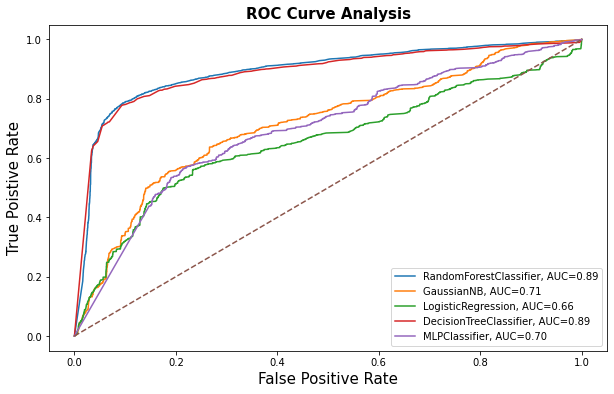

In [ ]:


plt.figure(figsize=(10,6))
for model in result.index.tolist():
    plt.plot(result.loc[model]['fpr'],
             result.loc[model]['tpr'],
             label= '{}, AUC={:.2f}'.format(model, result.loc[model]['auc']))
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Poistive Rate', fontsize =15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend()


ROC Curver Analysis for Tuned Models:

In [ ]:
All_the_models_used = [GaussianNB(var_smoothing=1e-08),LogisticRegression(C=0.01,penalty= 'l1',solver= 'liblinear'),
               DecisionTreeClassifier(criterion= 'gini', max_features= 'auto', max_leaf_nodes= 97, min_samples_split= 2),RandomForestClassifier(criterion='gini', max_features='auto', n_estimators=500), MLPClassifier(activation= 'tanh', learning_rate= 'constant', solver= 'lbfgs')]

In [ ]:
result = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for classifier in All_the_models_used:
    model_applied = classifier.fit(Initial_train, Dev_train)
    target_proba = model_applied.predict_proba(Initial_test)[:,1]
    
    fpr, tpr, _ = roc_curve(Dev_test,  target_proba)
    auc = roc_auc_score(Dev_test, target_proba)
    
    result = result.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [ ]:
result = result.set_index('classifiers')
result.index.tolist()

['GaussianNB',
 'LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'MLPClassifier']

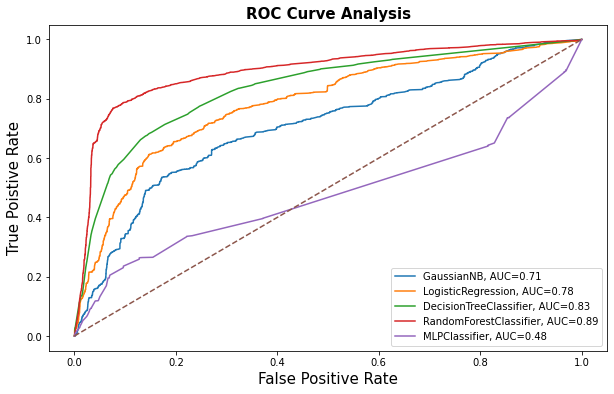

In [ ]:
plt.figure(figsize=(10,6))
for model in result.index.tolist():
    plt.plot(result.loc[model]['fpr'],
             result.loc[model]['tpr'],
             label= '{}, AUC={:.2f}'.format(model, result.loc[model]['auc']))
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Poistive Rate', fontsize =15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend()
